# Données multimédia : Python pour le traitement d’images et de données audio

## Master Humanités Numériques du [CESR](https://cesr.univ-tours.fr/)

Clément Plancq (MSH VDL / CITERES)

# Traitement d’images 2 : formats et compression

| Abréviation | Format du fichier (en)                    | Type MIME        | Extension(s) du fichier                | Résumé                                                                                                                                          |
|-------------|-------------------------------------------|---------------------|----------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| APNG        | Animated Portable Network Graphics       | `image/apng`       | `.apng`                               | Bon choix pour les animations sans perte de qualité. AVIF et WebP ont de meilleures performances mais une moins bonne couverture des navigateurs. |
| AVIF        | AV1 Image File Format                    | `image/avif`       | `.avif`                               | Un format avec de bonnes performances et sans licence commerciale qui peut être utilisé pour les images statiques comme animées.                |
| GIF         | Graphics Interchange Format              | `image/gif`        | `.gif`                                | Un bon choix pour les images simples et les animations. On préfèrera toutefois PNG pour les images statiques et WebP, AVIF ou APNG pour mieux. |
| JPEG        | Joint Photographic Expert Group          | `image/jpeg`       | `.jpg`, `.jpeg`, `.jfif`, `.pjpeg`, `.pjp` | Un bon choix pour les images compressées avec pertes. PNG sera préférable pour une meilleure fidélité, et WebP/AVIF pour de meilleurs taux.     |
| PNG         | Portable Network Graphics                | `image/png`        | `.png`                                | PNG pourra être préféré à JPEG pour une meilleure précision ou transparence. WebP/AVIF permettent de meilleurs taux de compression.             |
| SVG         | Scalable Vector Graphics                 | `image/svg+xml`    | `.svg`                                | Un format d'image vectoriel idéal pour les éléments d'interface utilisateur, icônes ou diagrammes s'affichant précisément quelle que soit l'échelle. |
| WebP        | Web Picture                              | `image/webp`       | `.webp`                               | Un excellent choix pour les images statiques ou animées, avec de meilleurs taux de compression que PNG ou JPEG.                                 |


<small>Tableau issu de [mdn web docs](https://developer.mozilla.org/fr/docs/Web/Media/Formats/Image_types#types_de_fichiers_dimages_communs)</small>

## Formats principaux

### JPEG (Joint Photographic Experts Group) ISO/CEI 10918-1

- Compression avec perte
- Idéal pour les photographies

### PNG (Portable Network Graphics)

- Compression sans perte
- Transparence
- Utilisation pour les graphiques, logos, images avec texte

### WebP

- Format moderne développé par Google
- Compression performante
- Utilisation sur le web

### JPEG 2000

- Compression avancée
- Utilisations professionnelles

### RAW

- Format "brut" des appareils photo
- Conservation de toutes les données de l'image
- Utilisation en photographie professionnelle

Il existe de nombreux autres formats de fichier pour les images. Vous pouvez consulter la [documentation de Pillow](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html) pour en savoir plus 

## Compression d'images : Principes et types

La compression est une technique qui permet de réduire la taille d'un fichier image en diminuant la quantité de données nécessaires pour le stocker ou le transmettre.

### Compression sans perte
Principe : Toutes les informations originales de l'image sont conservées intégralement.

Aucune donnée n'est supprimée  
Le fichier compressé peut être restauré exactement comme l'original (*réversibilité*)  
Idéale pour les images avec des détails critiques  
Exemples de formats : PNG, TIFF, BMP


#### Avantages :
 - Préservation totale de la qualité
 - Parfait pour les documents, graphiques, logos
 - Utile pour l'archivage et le traitement scientifique

#### Techniques de compression sans perte :

- Réduction des redondances
- Encodage par séquences répétitives
- Algorithmes de compression comme LZW

### Compression avec perte
Principe : Des données sont délibérément supprimées pour réduire la taille du fichier.

Certaines informations sont sacrifiées (pas de *réversibilité*)  
Qualité légèrement dégradée  
Idéale pour les photographies et images web  
Exemples de formats : JPEG, WebP


#### Avantages :

- Fichiers beaucoup plus petits
- Transmission web plus rapide
- Adaptation aux contraintes de stockage

#### Mécanismes de compression avec perte :

- Réduction des détails imperceptibles
- Simplification des zones homogènes
- Élimination des informations considérées comme moins importantes visuellement

Le choix du format dépend de :

- L'utilisation prévue
- La criticité des détails
- Les contraintes de stockage et transmission

## Tests de conversion avec différents taux de compression

✏️ Comparez les tailles de fichiers et le rendu en fonction des formats et des taux de compresssion

In [6]:
from PIL import Image

original_image = Image.open('../img/CPR_1130x400.jpg')
# original_image = Image.open('/content/CPR_1130x400.jpg') pour Colab (et uploader l'image avant)


original_image.save('../img/CPR_1130x400.png', 'png')
original_image.save('../img/CPR_1130x400_q80.jpg', 'jpeg', quality=80)
original_image.save('../img/CPR_1130x400_q80.webp', 'webp', quality=80)
original_image.save('../img/CPR_1130x400_q50.jpg', 'jpeg', quality=50)
original_image.save('../img/CPR_1130x400_q50.webp', 'webp', quality=50)
original_image.save('../img/CPR_1130x400_q10.jpg', 'jpeg', quality=10)
original_image.save('../img/CPR_1130x400_q10.webp', 'webp', quality=10)

## Format JPEG : précisions

JPEG (*Joint Photographic Experts Group*) est une norme qui définit le format d'enregistrement et l'algorithme de décodage pour une représentation numérique compressée d'une image fixe ([https://fr.wikipedia.org/wiki/JPEG](https://fr.wikipedia.org/wiki/JPEG))

Le plus souvent les images jpeg utilisent une compression avec perte (compression irréversible). Le taux de compression peut varier de 3 à 100

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Felis_silvestris_silvestris_small_gradual_decrease_of_quality.png)

<small>Felis_silvestris_silvestris.jpg: Michael Gäblerderivative work: AzaToth, CC BY 3.0 <https://creativecommons.org/licenses/by/3.0>, via Wikimedia Commons </small>

### Conséquences de la compression

1. Perte d'information

- Réduction des détails fins
- Dégradation progressive de l'image
- Plus le taux de compression est élevé, plus la perte est importante


2. Impact visuel

- Apparition d'effets de blocs (8x8)
- Dégradation des zones homogènes
- Perte de netteté

### À retenir :

- La compression n'est pas une perte aléatoire
- C'est un processus mathématique et perceptuel
- Le choix de la qualité est un compromis

### Processus de compression

1. **Transformation des couleurs**
2. **Sous-échantillonnage de la chrominance**
3. Découpage en blocs
4. Transformée DCT
5. Quantification
6. Codage, **compression RLE** et Huffman

Source : [https://fr.wikipedia.org/wiki/JPEG](https://fr.wikipedia.org/wiki/JPEG)


### Processus de décompression d'un fichier JPG

#### Lecture du fichier

- Le fichier contient des métadonnées
- Des informations sur la compression
- Les données compressées

#### Décodage JPEG

- Inverse exact des étapes de compression
- Reconstruction mathématique de l'image

### Transformation des couleurs

RVB -> YCbCr

Y est l'information de luminance, Cb (chrominance bleue) et Cr (chrominance rouge) sont deux informations de chrominance  
C’est donc un codage de type luminance/chrominance

L’œil humain est assez sensible à la luminance (la luminosité) mais peu à la chrominance (la teinte) d'une image

### Sous-échantillonnage de la chrominance

![](https://upload.wikimedia.org/wikipedia/commons/1/13/Sous-%C3%A9chantillonnage_de_la_chrominance.png)
<small>http://en.wikipedia.org/wiki/Chroma_subsampling, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons</small>

Le principe de l'opération est de diminuer le nombre d’échantillons pour réduire le volumen d’informations à transmettre. On pourra avoir un seul échantillon de Cb et Cr pour plusieurs pixels. Les blocs de luminance (blocs Y) ne sont pas modifiés.


### Compression RLE

*Run-Length Encoding* (RLE) est un algorithme de compression de données sans perte qui consiste à remplacer les suites de valeurs identiques par une paire composée du nombre de répétition et de la valeur à répéter

[1, 1, 1, 2, 2, 3, 3, 3, 3] sera encodé comme [(1, 3), (2, 2), (3, 4)]

C’est très efficace sur des images avec grandes zones uniformes

## Filtres et modification d’images

## Filtres de flou (*blur*)

Nous allons d’abord utiliser le filtre de type `Box Blur` (voir https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html#PIL.ImageFilter.BoxBlur)

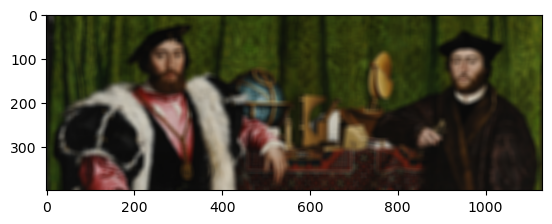

In [3]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

im = Image.open('../img/CPR_1130x400.jpg')
im_blur = im.filter(ImageFilter.BoxBlur(6))
plt.imshow(im_blur)

✏️ Faîtes varier le paramètre (le radius) jusqu’à arriver à un niveau de flou où on ne distingue plus rien

### Comment ça fonctionne ?

Pour comprendre comment fonctionne les filtres il faut comprendre ce qu’est un noyau (*kernel*) et ce qu’est une convolution.

Le principe général est qu’on va modifier la valeur d’un pixel en fonction de celle de ses voisins.

La convolution est une opération mathématique qui combine deux ensembles de données pour en créer un troisième.  Vous prenez une petite matrice (appelée filtre ou noyau) et la faites "glisser" sur toute l'image. À chaque position, vous multipliez les valeurs du filtre par les valeurs correspondantes de l'image, puis vous additionnez ces résultats.  
Le total obtenu est la nouvelle valeur pour la position actuelle dans l'image filtrée.

Cette visualisation permettra d’y voir plus clair : https://setosa.io/ev/image-kernels/


Exemple de noyau (3x3) pour le Box Blur
$$
\frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$$

D’autres exemples de noyaux : https://fr.wikipedia.org/wiki/Noyau_(traitement_d'image)

On trouve une implémentation de la convolution dans [numpy](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html#numpy-convolve) et [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)

## sharpen, smooth

Deux autres filtres sont souvent utilisés : *sharp* et *smooth*.  
- *sharp* accentue les contrastes et les détails  
- *smooth* est le contraire, il laisse les contrastes et uniformise les détails

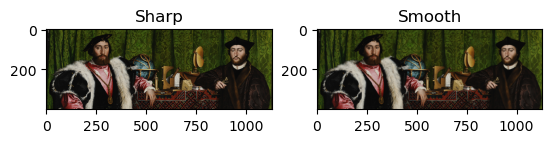

In [4]:
im = Image.open('../img/CPR_1130x400.jpg')
im_sharp = im.filter(ImageFilter.SHARPEN)
im_smooth = im.filter(ImageFilter.SMOOTH)

plt.subplot(1, 2, 1)
plt.imshow(im_sharp)
plt.title('Sharp')

plt.subplot(1, 2, 2)
plt.imshow(im_smooth)
plt.title('Smooth')

plt.show()

✏️ En vous basant sur la documentation de [https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html) et les exemples, essayez les filtres DETAIL, EMBOSS

In [10]:
# DETAIL

# EMBOSS

## Détection des contours

En traitement d'image, on appelle détection de contours les procédés permettant de repérer les points d'une image matricielle qui correspondent à un changement brutal de l'intensité lumineuse.

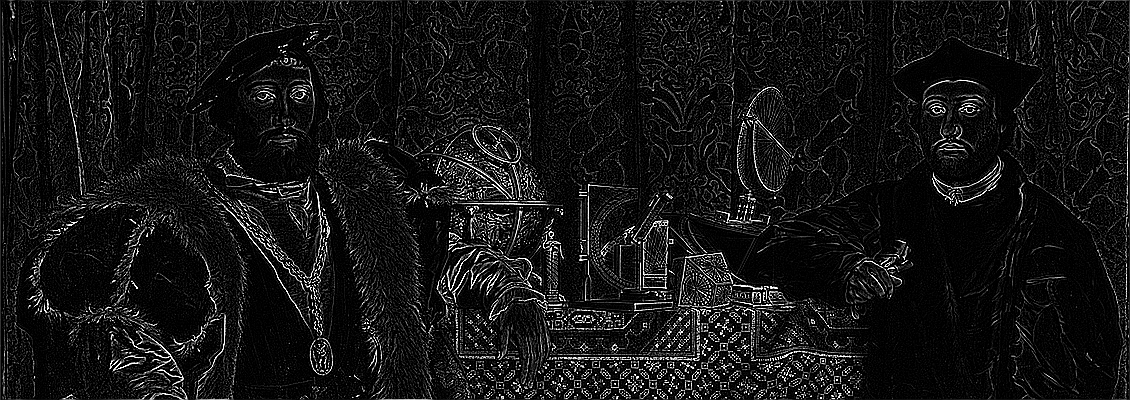

In [7]:
im_gray = im.convert("L")
edges = im_gray.filter(ImageFilter.FIND_EDGES)
display(edges)

## Seuillage (*thresholding*)

- Le seuillage est la technique la plus simple pour faire de la segmentation d’image
- Depuis un niveau de gris le seuillage permet de binariser une image



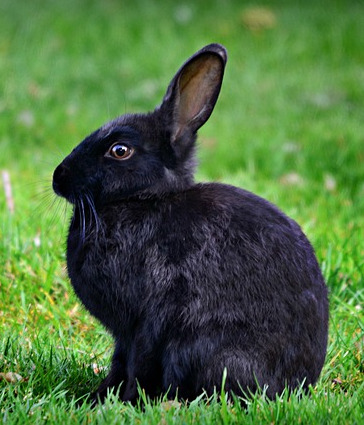

In [8]:
from IPython.display import display
from PIL import Image

im_rabbit = Image.open('../img/bunny.jpg')
display(im_rabbit)

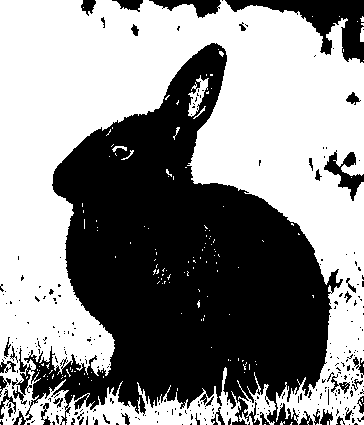

In [9]:
# passage en niveaux de gris
im_rabbit_gray = im_rabbit.convert("L")
threshold = 100 # définition du seuil

# seuillage avec point (https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#point-operations)
im_rabbit_threshold = im_rabbit_gray.point(
    lambda x: 255 if x > threshold else 0
 )
display(im_rabbit_threshold)

✏️ Faîter varier la valeur du seuil pour voir les différences de traitement  

En général la zone que l’on souhaite segmenter est en blanc et le reste en noir  
✏️ Modifiez le code pour avoir la sélection en blanc

✏️ Écrivez une fonction qui donnera un effet sepia à l’image passée en paramètre
